El numero optimo del clusters en el dataset dengue es 3 clusters
[-3295.31459434  -629.1043818    507.94469304  1874.45610059
  2494.49859745  2955.02286997  3349.82124364  3834.85581143
  4308.07056653  4648.35623207]


"\nNc = range(1, 10)\nkmeans = [KMeans(n_clusters=i) for i in Nc]\nscore = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]\nkmeans=np.asarray(kmeansns)\nscore=np.asarray(score)\nscore=1.0-score\nplt.plot(Nc,score)\nplt.xlabel('Number of Clusters')\nplt.ylabel('SSE')\nplt.title('Elbow Curve')\nplt.savefig('Elbow_Curve.pdf')\nprint('El numero optimo del clusters en el dataset dengue es 3 clusters')\n"

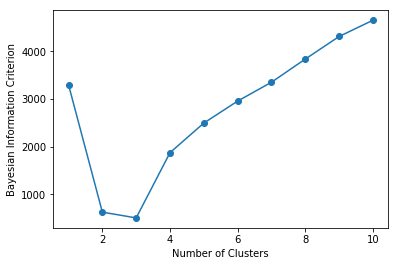

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.decomposition import PCA
from sklearn import cluster
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D

random_state = 170
data=pd.read_csv('dengue.csv')
data=data.dropna()
#X=sklearn.preprocessing.normalize(X)
X=data[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']].values
X=sklearn.preprocessing.normalize(X)

def compute_bic(kmeans,X):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = X.shape
    cl_var = (1.0/(N-m)/d)*sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]],'euclidean')**2) for i in range(m)])
    const_term = 0.5*m*np.log(N)*(d+1)
    BIC = np.sum([n[i]*np.log(n[i])-n[i] * np.log(N)-((n[i]*d)/2)*np.log(2*np.pi*cl_var)-((n[i] - 1)*d/2) for i in range(m)]) - const_term
    return(BIC)


k_c = np.arange(1,11,1)
k_c=np.asarray(k_c)
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in k_c]

BIC =np.asarray( [compute_bic(kmeansi,X) for kmeansi in KMeans])
ii=np.argmin(abs(BIC))
mn=k_c[ii]
plt.plot(k_c,abs(BIC),marker='o',linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Bayesian Information Criterion")
print('El numero optimo del clusters en el dataset dengue es {} clusters'.format(mn))
print(BIC)
"""
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
kmeans=np.asarray(kmeansns)
score=np.asarray(score)
score=1.0-score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.savefig('Elbow_Curve.pdf')
print('El numero optimo del clusters en el dataset dengue es 3 clusters')
"""

[[ 0.89847253  1.6673121  -1.28544116]
 [ 0.89847253  1.6673121  -1.08096645]
 [ 0.89847253  1.6673121  -1.08096645]
 ...
 [-0.41793805 -0.68351484  0.87468283]
 [-0.41793805 -0.68351484  0.87468283]
 [-0.41793805 -0.68351484  1.07894108]]
La Componente 1 explica el 35.30717177434728% de los datos
La Componente 2 explica el 68.72836103055076% de los datos
La Componente 3 explica el 100.0% de los datos


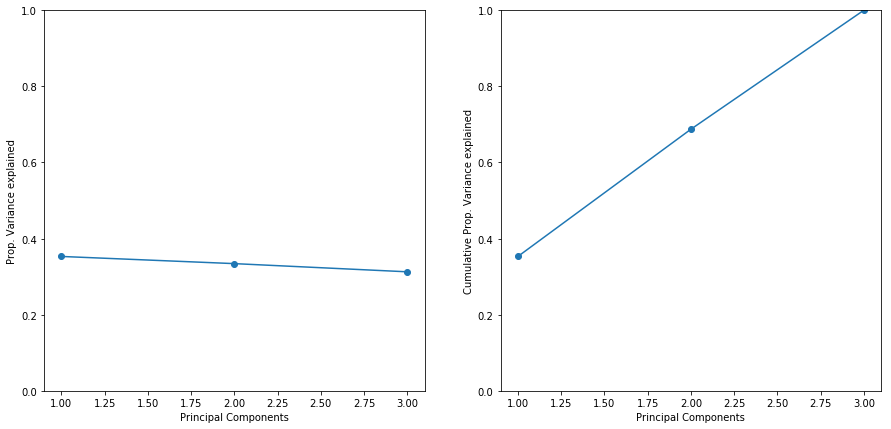

In [22]:
## Segunda parte 
data=pd.read_csv('BreadBasket_DMS.csv')
X=data[['Date', 'Time']].values
t=data['Item'].values
le = sklearn.preprocessing.LabelEncoder()
le.fit(t)
t=le.transform(t)
#print(t)

nd=3
dat=np.ones((len(X[:,0]),nd))

for i in range(len(X[:,0])):
    a,s,d=X[i,0].split('-')
    j,k,l=X[i,1].split(':')
    #dat[i,0]=a
    dat[i,0]=s
    dat[i,1]=d
    dat[i,2]=j+k+l
    #dat[i,5]=k
    #dat[i,6]=l
#dat[:,4]=t#X[:,2]
#dat[:,8]=t

dat=sklearn.preprocessing.scale(dat)
print(dat)
nc=nd
plt.figure(figsize = (15,7))
plt.subplot(121)
pca = PCA(n_components=nc)
pca.fit(dat)
PEV=pca.explained_variance_ratio_
PEV=PEV/sum(PEV)
PC=np.arange(1.0,len(PEV)+1,1.0)
plt.plot(PC,PEV,marker='o',linestyle='-')
plt.xlabel('Principal Components')
plt.ylim([0,1.0])
plt.ylabel('Prop. Variance explained')

plt.subplot(122)
CPEV=np.ones(len(PEV))
CPEV[0]=PEV[0]
for i in range(1,len(PEV)):
    CPEV[i]=CPEV[i-1]+PEV[i]
percent=CPEV*100
for i in range(nc):
    print('La Componente {} explica el {}% de los datos'.format(i+1,percent[i]))

plt.plot(PC,CPEV,marker='o',linestyle='-')
plt.xlabel('Principal Components')
plt.ylim([0,1.0])
plt.ylabel('Cumulative Prop. Variance explained')
plt.savefig('PEV_BB.pdf')


El numero optimo del clusters en el dataset BreadBasket es 9 clusters


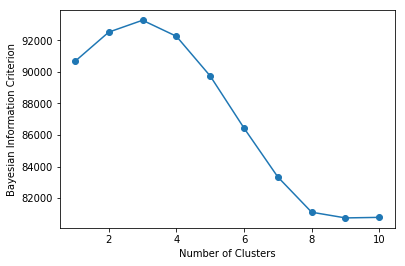

In [29]:
k_c = np.arange(1,11,1)
k_c=np.asarray(k_c)
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(dat) for i in k_c]

BIC =np.asarray( [compute_bic(kmeansi,dat) for kmeansi in KMeans])
ii=np.argmin(abs(BIC))
mnc=k_c[ii]
plt.plot(k_c,abs(BIC),marker='o',linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Bayesian Information Criterion")
print('El numero optimo del clusters en el dataset BreadBasket es {} clusters'.format(mnc))


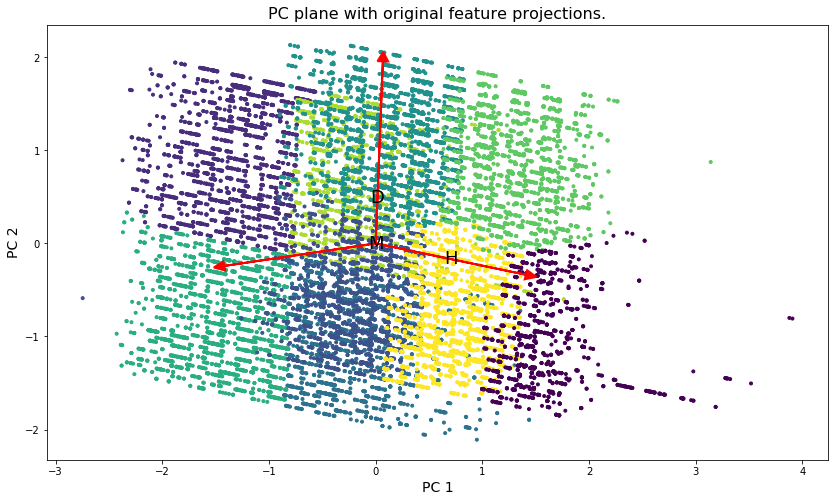

In [33]:
#c=3
nc=2
pca = PCA(n_components=nc)
PC = pca.fit_transform(dat)
PDF = pd.DataFrame(PC, columns = ['PC 1', 'PC 2'])#,'PC 3'])

def biplot(data, reduced_data, pca):
    feature_vectors = pca.components_.T
    fig, ax = plt.subplots(figsize = (14,8))

    # scatterplot of the reduced data
    PC1=reduced_data.loc[:, 'PC 1']
    PC2=reduced_data.loc[:, 'PC 2']
    #y_pred=pca.fit_predict(data)
    #PC3=reduced_data.loc[:, 'PC 3']
    #ax = fig.add_subplot(111, projection='3d')
    #ax.scatter3D(PC1,PC2,PC3, marker='.')
    KM=cluster.KMeans(n_clusters = 9)
    y_pred=KM.fit_predict(data)
    ax.scatter(PC1,PC2, marker='.',c=y_pred)    

    # using scaling factors to make the arrows
    arrow_size, text_pos = 2.0, 0.5

    # projections of the original features
    names=np.asarray(['M','D','H'])
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(i*v[0]*text_pos, i*v[1]*text_pos, names[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("PC 1", fontsize=14)
    ax.set_ylabel("PC 2", fontsize=14)
    #ax.set_ylabel("PC 3", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16)
    #print(PC1,PC2)
    """
    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1', finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    """
    return ax

biplot(dat, PDF, pca)

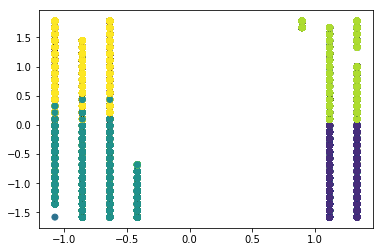

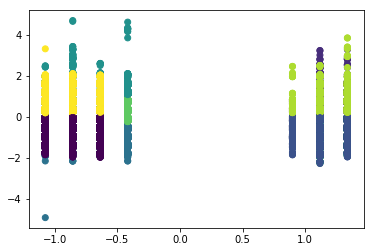

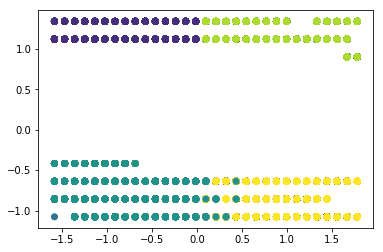

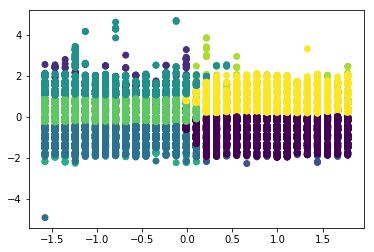

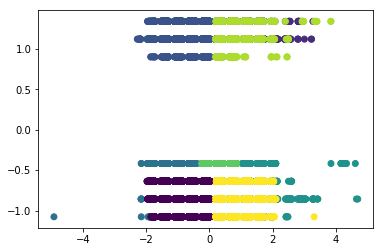

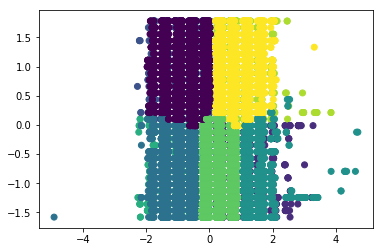

In [32]:
random_state = 170
nclusters=9 ##Por 
y_pred = sklearn.cluster.KMeans(n_clusters=nclusters, random_state=random_state).fit_predict(dat)
nd=3
for i in range(0,nd):
    for j in range(0,nd):    
        if(i!=j):
            plt.scatter(dat[:, int(i)], dat[:, int(j)], c=y_pred)
            plt.show()
print('Se observa que existe patrones, observados en PCA y ')

[[-1.21951197  0.89847253  1.6673121  ... -1.06303379 -1.7760173
  -1.05799179]
 [-1.21951197  0.89847253  1.6673121  ...  0.26337911 -1.77565858
   1.32391556]
 [-1.21951197  0.89847253  1.6673121  ...  0.26337911 -1.77565858
   1.32391556]
 ...
 [ 0.82000015 -0.41793805 -0.68351484 ... -1.35138442  1.69710553
  -0.61138416]
 [ 0.82000015 -0.41793805 -0.68351484 ... -1.35138442  1.69710553
   0.98895984]
 [ 0.82000015 -0.41793805 -0.68351484 ... -0.31332215  1.69746425
   1.43556746]]
La Componente 1 explica el 34.261971504460774% de los datos
La Componente 2 explica el 48.347236012611006% de los datos
La Componente 3 explica el 61.09826160540883% de los datos
La Componente 4 explica el 73.53650708621412% de los datos
La Componente 5 explica el 85.76972589849518% de los datos
La Componente 6 explica el 96.71629627311208% de los datos
La Componente 7 explica el 99.99913527101664% de los datos
La Componente 8 explica el 100.00000000000003% de los datos


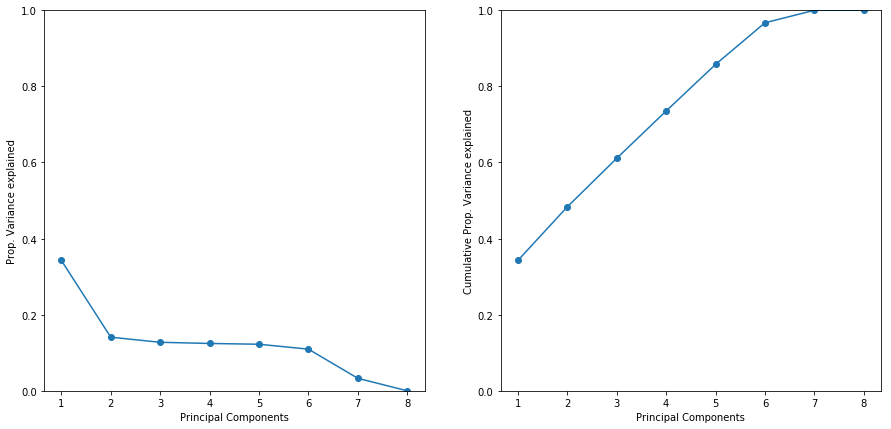

In [8]:
## NO VER ESTA PARTE 
data=pd.read_csv('BreadBasket_DMS.csv')
X=data[['Date', 'Time','Transaction' ]].values
t=data['Item'].values
le = sklearn.preprocessing.LabelEncoder()
le.fit(t)
t=le.transform(t)
#print(t)

nd=8
dat=np.ones((len(X[:,0]),nd+1))

for i in range(len(X[:,0])):
    a,s,d=X[i,0].split('-')
    j,k,l=X[i,1].split(':')
    dat[i,0]=a
    dat[i,1]=s
    dat[i,2]=d
    dat[i,4]=j
    dat[i,5]=k
    dat[i,6]=l
dat[:,7]=X[:,2]
dat[:,8]=t

dat=sklearn.preprocessing.scale(dat)
print(dat)
nc=nd
plt.figure(figsize = (15,7))
plt.subplot(121)
pca = PCA(n_components=nc)
pca.fit(dat)
PEV=pca.explained_variance_ratio_
PEV=PEV/sum(PEV)
PC=np.arange(1.0,len(PEV)+1,1.0)
plt.plot(PC,PEV,marker='o',linestyle='-')
plt.xlabel('Principal Components')
plt.ylim([0,1.0])
plt.ylabel('Prop. Variance explained')

plt.subplot(122)
CPEV=np.ones(len(PEV))
CPEV[0]=PEV[0]
for i in range(1,len(PEV)):
    CPEV[i]=CPEV[i-1]+PEV[i]
percent=CPEV*100
for i in range(nc):
    print('La Componente {} explica el {}% de los datos'.format(i+1,percent[i]))

plt.plot(PC,CPEV,marker='o',linestyle='-')
plt.xlabel('Principal Components')
plt.ylim([0,1.0])
plt.ylabel('Cumulative Prop. Variance explained')
plt.savefig('PEV_BB.pdf')







El numero optimo del clusters en el dataset BreadBasket es 10 clusters


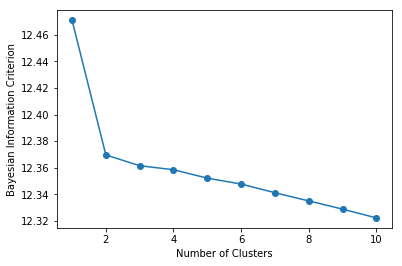

In [9]:
k_c = np.arange(1,11,1)
k_c=np.asarray(k_c)
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(dat) for i in k_c]

BIC =np.asarray( [compute_bic(kmeansi,dat) for kmeansi in KMeans])
ii=np.argmin(abs(BIC))
mnc=k_c[ii]
plt.plot(k_c,np.log(abs(BIC)),marker='o',linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Bayesian Information Criterion")
print('El numero optimo del clusters en el dataset BreadBasket es {} clusters'.format(mnc))


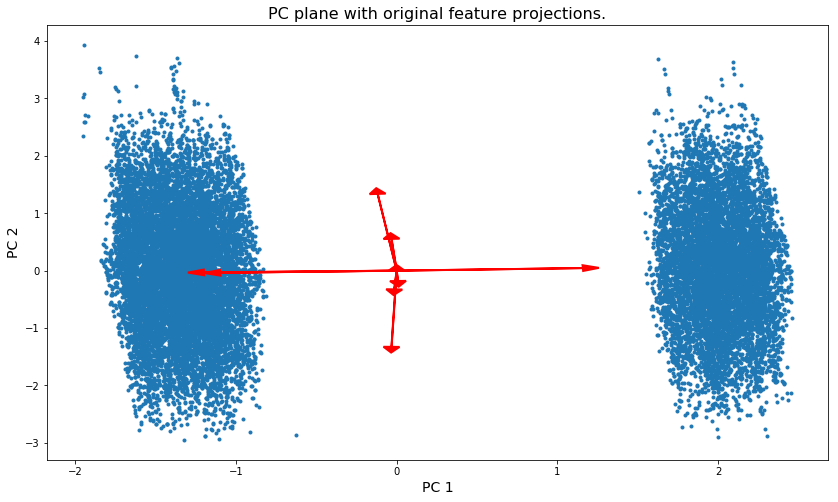

In [10]:
#nc=3
nc=2
pca = PCA(n_components=nc)
PC = pca.fit_transform(dat)
PDF = pd.DataFrame(PC, columns = ['PC 1', 'PC 2'])#,'PC 3'])

def biplot(data, reduced_data, pca):
    feature_vectors = pca.components_.T
    fig, ax = plt.subplots(figsize = (14,8))

    # scatterplot of the reduced data
    PC1=reduced_data.loc[:, 'PC 1']
    PC2=reduced_data.loc[:, 'PC 2']
    #PC3=reduced_data.loc[:, 'PC 3']
    #ax = fig.add_subplot(111, projection='3d')
    #ax.scatter3D(PC1,PC2,PC3, marker='.')
    ax.scatter(PC1,PC2, marker='.')    

    # using scaling factors to make the arrows
    arrow_size, text_pos = 2.0, 0.5

    # projections of the original features
    
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        #ax.text(i*v[0]*text_pos, i*v[1]*text_pos, data.columns[i+1], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("PC 1", fontsize=14)
    ax.set_ylabel("PC 2", fontsize=14)
    #ax.set_ylabel("PC 3", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16)
    #print(PC1,PC2)
    """
    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1', finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
    """
    return ax

biplot(dat, PDF, pca)


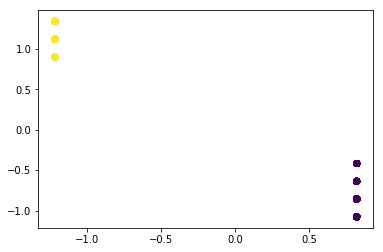

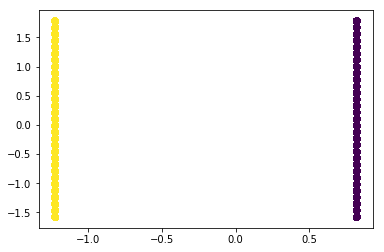

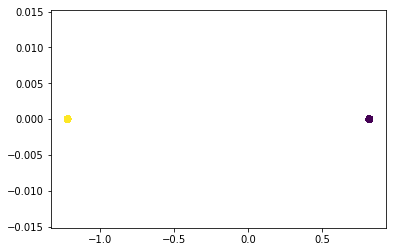

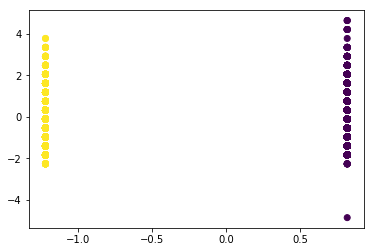

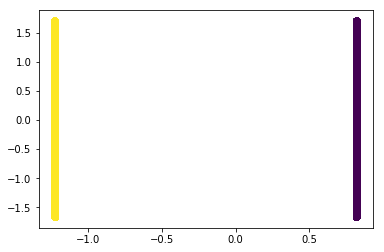

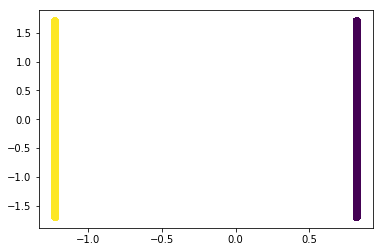

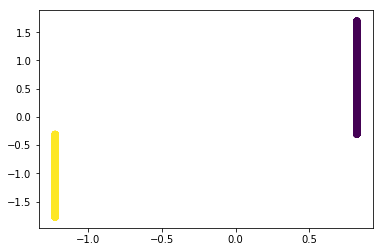

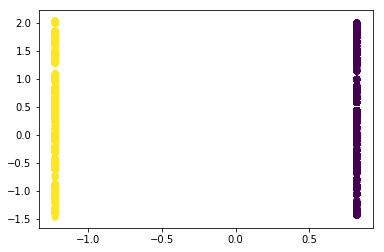

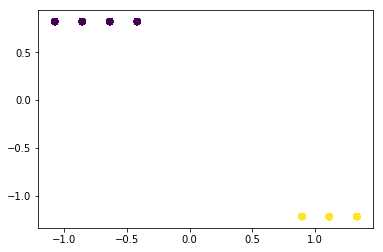

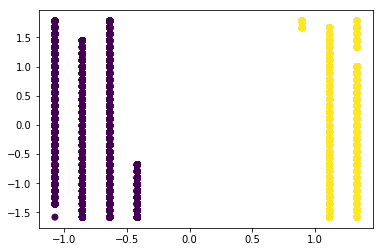

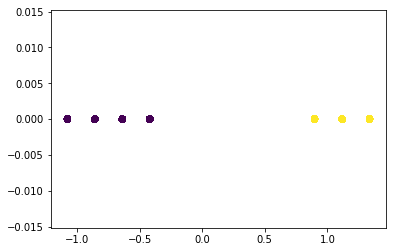

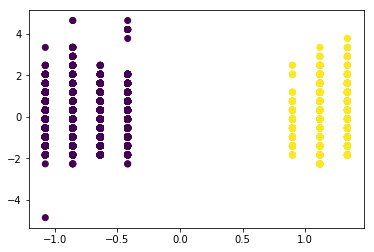

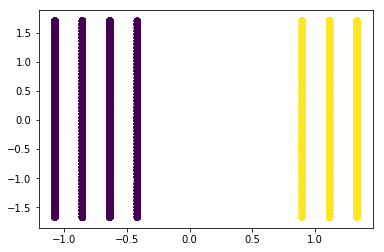

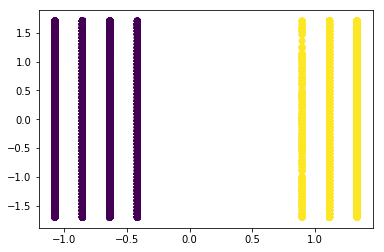

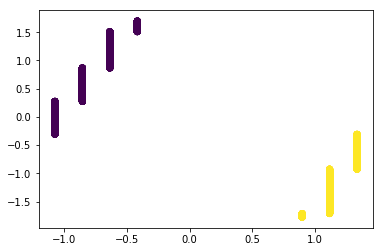

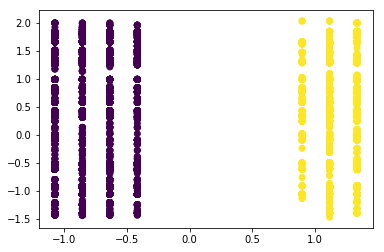

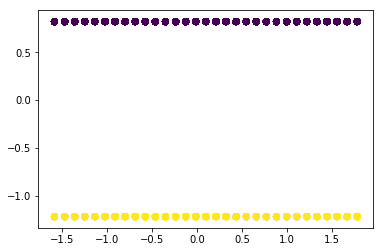

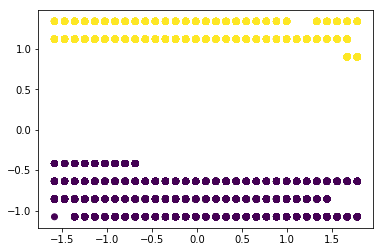

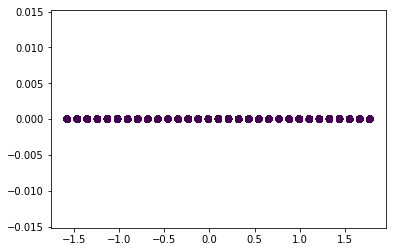

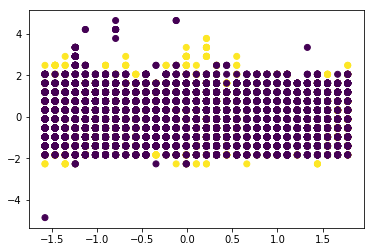

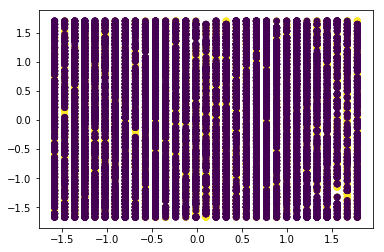

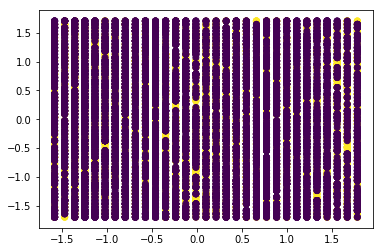

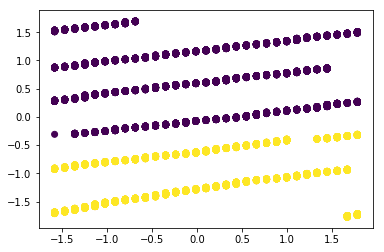

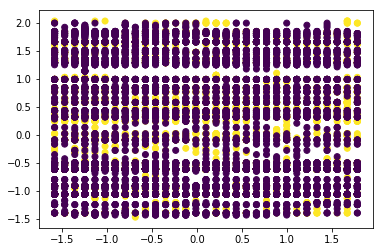

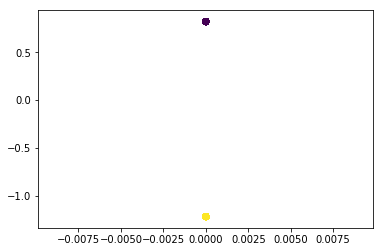

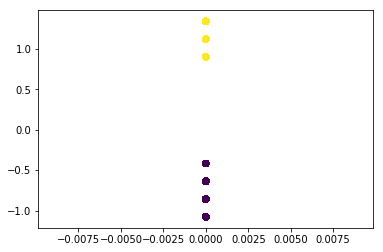

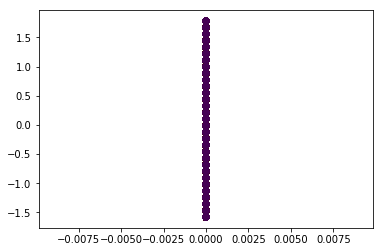

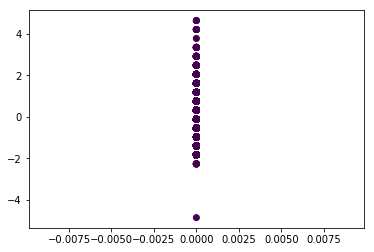

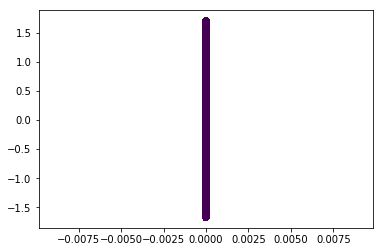

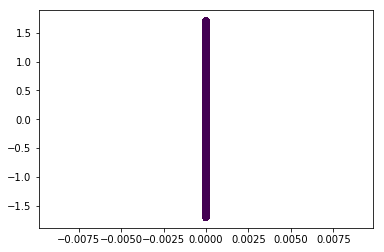

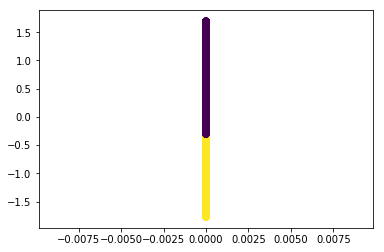

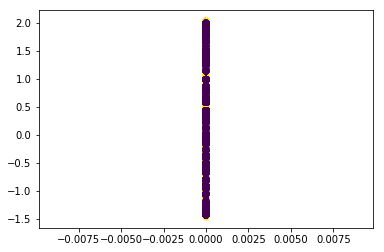

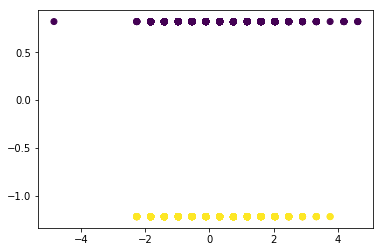

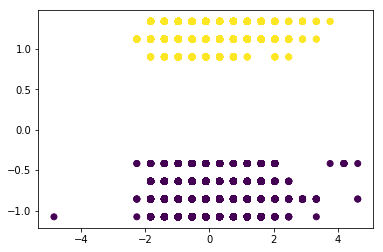

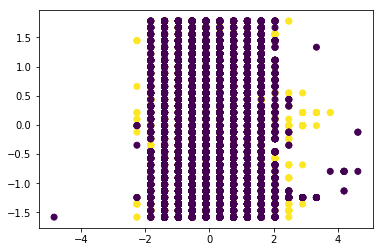

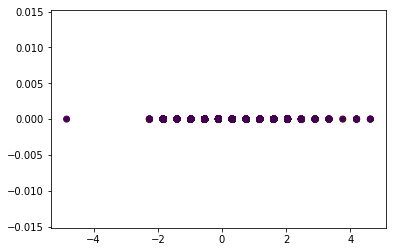

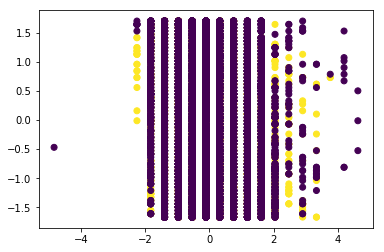

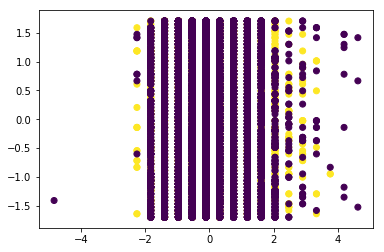

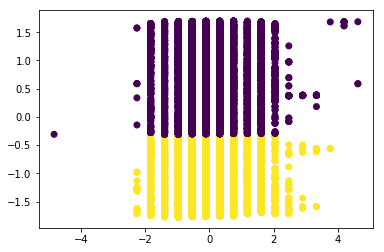

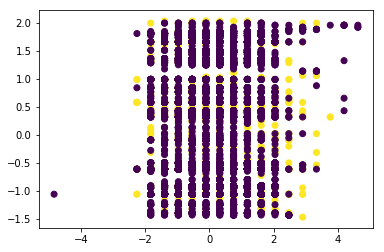

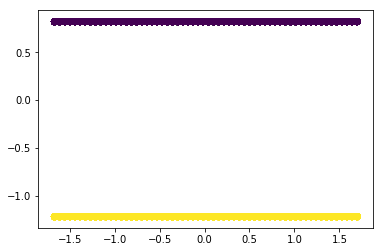

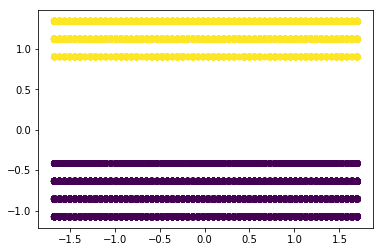

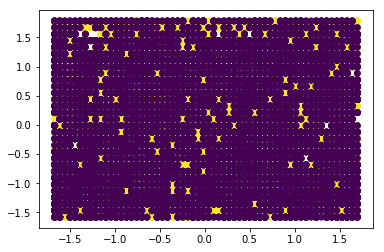

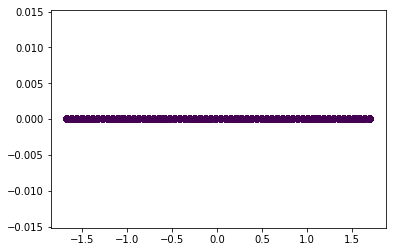

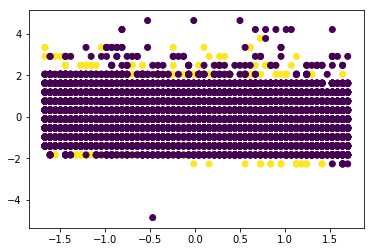

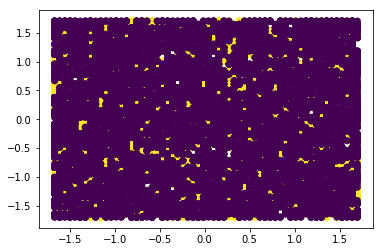

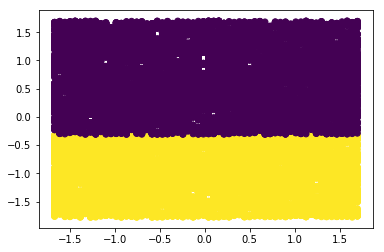

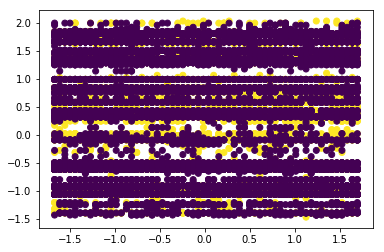

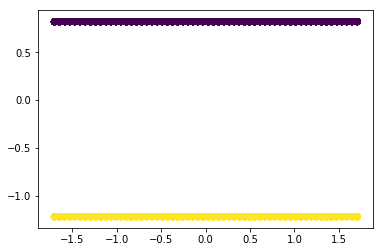

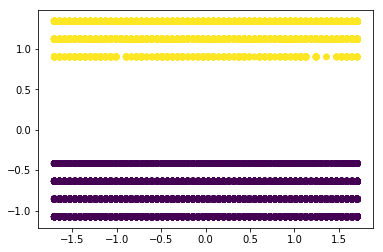

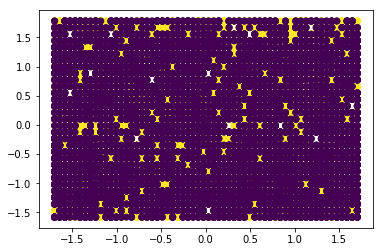

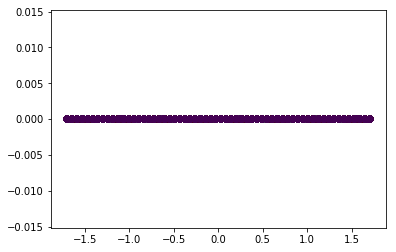

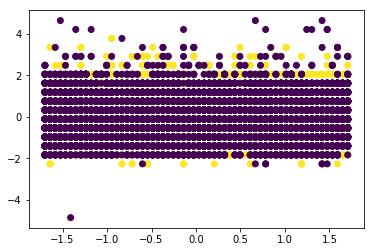

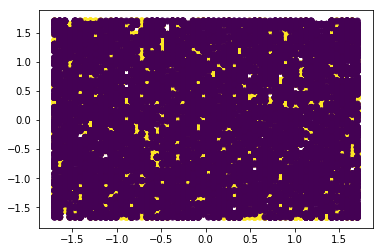

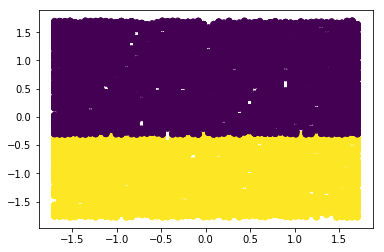

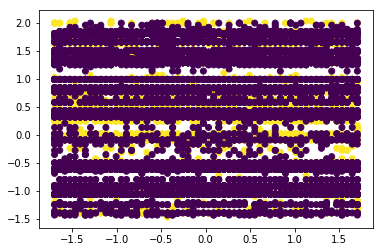

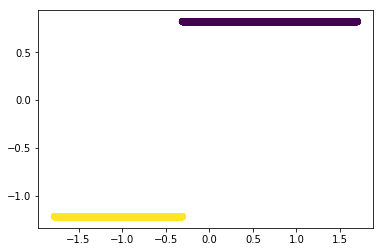

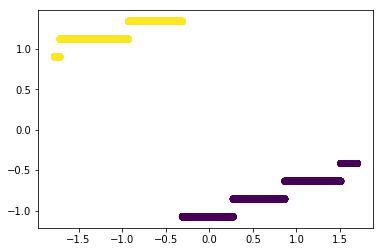

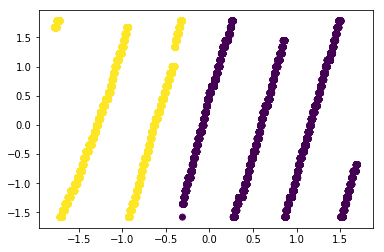

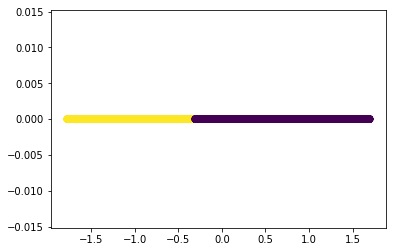

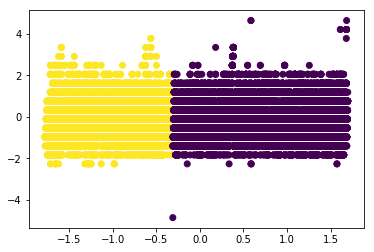

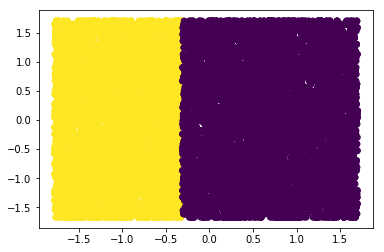

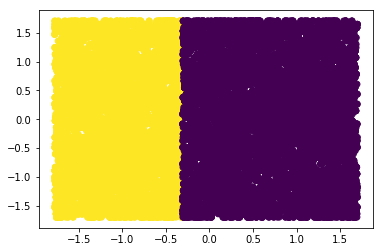

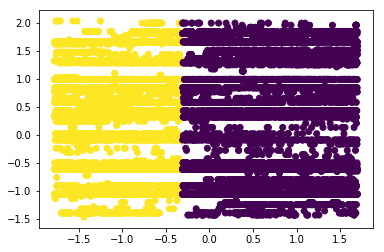

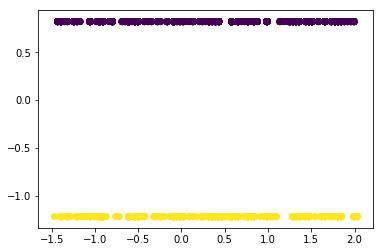

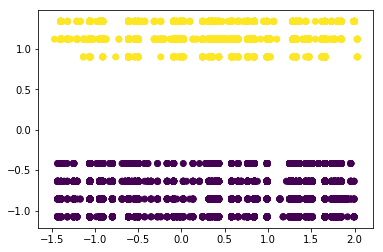

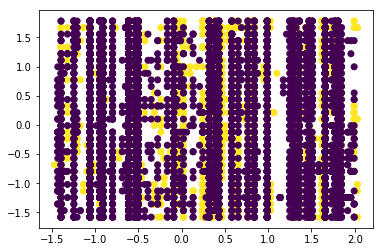

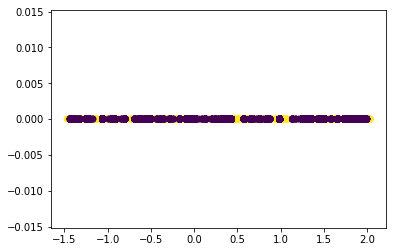

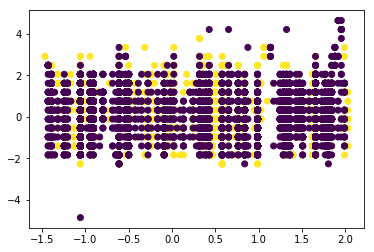

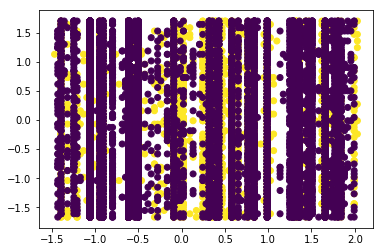

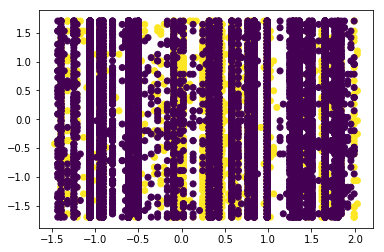

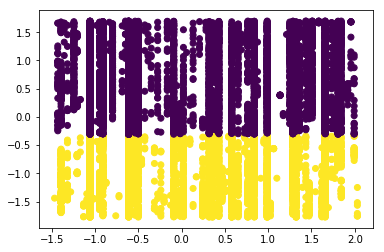

In [26]:
random_state = 170
y_pred = sklearn.cluster.KMeans(n_clusters=2, random_state=random_state).fit_predict(dat)
nd=8
for i in range(0,nd+1):
    for j in range(0,nd+1):    
        if(i!=j):
            plt.scatter(dat[:, int(i)], dat[:, int(j)], c=y_pred)
            plt.show()